In [1]:
# Decision Tree Classification on Heart Disease
# Dataset: /mnt/data/heart_disease.xlsx (sheet "Heart_disease")
# Tasks covered: EDA, preprocessing, modeling, tuning, evaluation & visualization

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Preprocessing & Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [5]:
# 1) Data Loading
file_path = r"C:\Users\admin\Downloads\Excelr Assignment\Decision Tree\Decision Tree\heart_disease.xlsx"
df = pd.read_excel(file_path, sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
df.shape

(908, 13)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
# 2) EDA: missing values, basic stats, Data Visualization etc
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


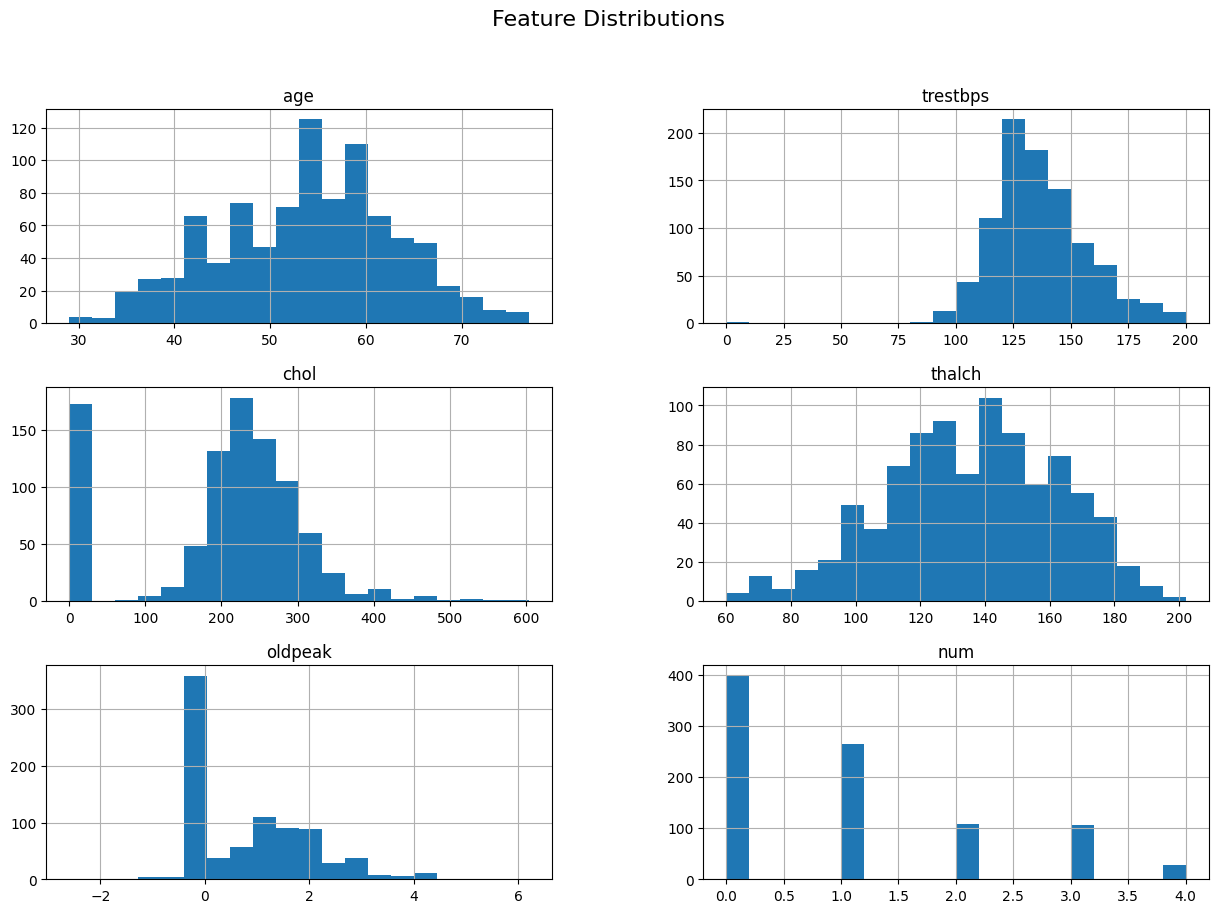

In [12]:
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


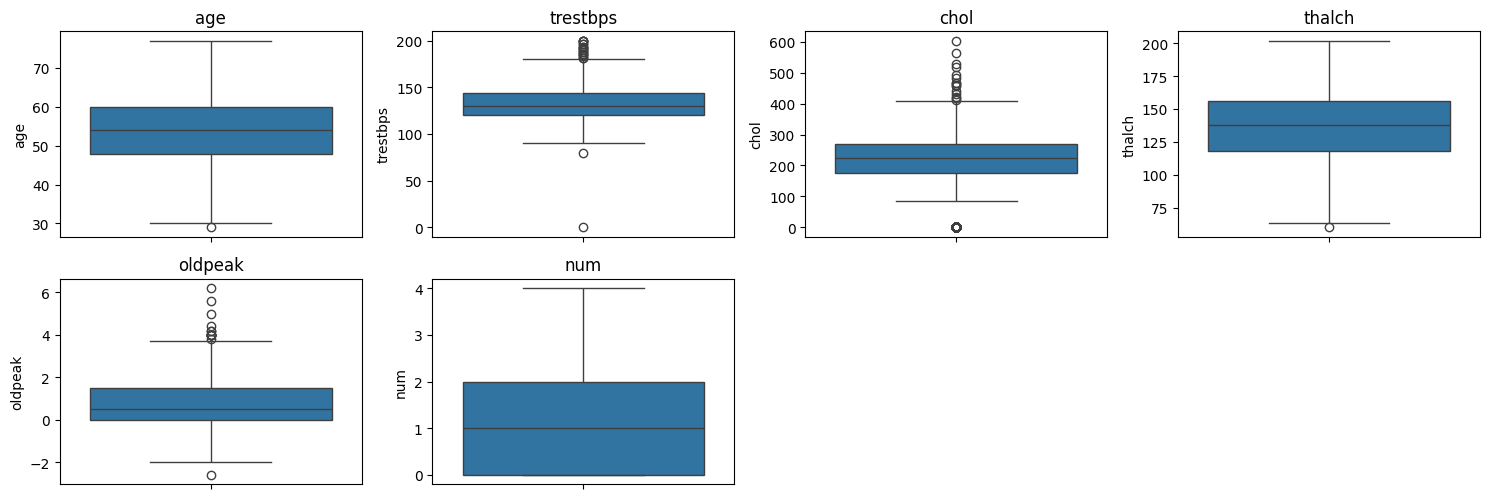

In [13]:
# Box plots (only for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Encoded dataframe head:
    age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      1      2.3      0   
1   41    1   1       135   203    0        1     132      1      0.0      1   
2   57    1   0       140   192    0        1     148      1      0.4      1   
3   52    1   3       118   186    0        0     190      1      0.0      1   
4   57    1   0       110   201    0        1     126      3      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


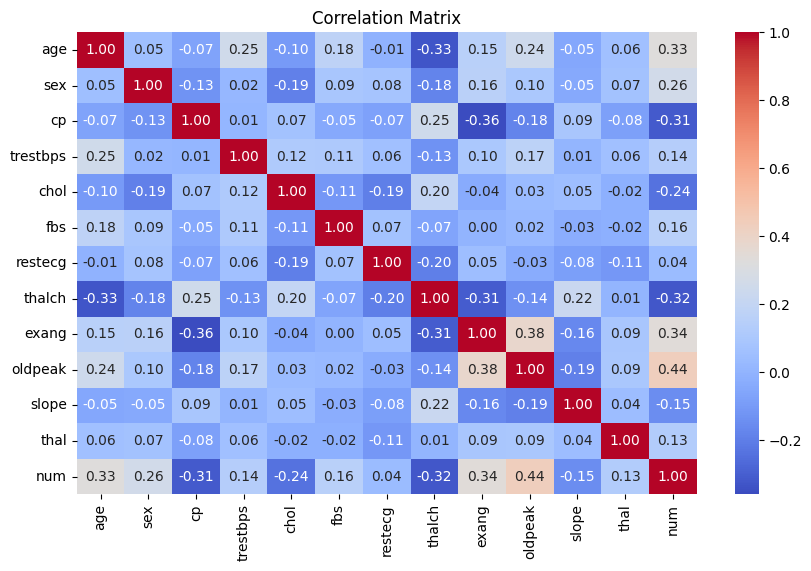

In [14]:
# Correlation Heatmap (numeric columns only)
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe
df_encoded = df.copy()

# Encode categorical columns (object or bool types)
for col in df_encoded.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Now only numeric values remain
print("Encoded dataframe head:\n", df_encoded.head())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [15]:
#3. Feature Engineering
# Define features and target
X = df.drop(columns=["num"])
y = df["num"]  # multiclass target (0–4)

# Check missing values
print("Missing values per column:\n", X.isnull().sum())

# Fill missing values (option 1: mean for numeric, mode for categorical)
for col in X.columns:
    if X[col].dtype == "object":   # categorical
        X[col] = X[col].fillna(X[col].mode()[0])
    else:                          # numeric
        X[col] = X[col].fillna(X[col].mean())

Missing values per column:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
dtype: int64


In [16]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define features and target
X = df.drop(columns=["num"])
y = df["num"]

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical columns:", cat_cols.tolist())
print("Numeric columns:", num_cols.tolist())

# One-Hot Encode categorical variables
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Handle missing values (after encoding)
X = X.fillna(X.mean())

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Categorical columns: ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
Numeric columns: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']


In [18]:
# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("\nClass distribution after SMOTE:\n", y_resampled.value_counts())


Class distribution before SMOTE:
 num
0    319
1    212
2     87
3     86
4     22
Name: count, dtype: int64

Class distribution after SMOTE:
 num
0    319
1    319
2    319
3    319
4    319
Name: count, dtype: int64


In [19]:
#4. Decision Tree Classification
# Train baseline Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [20]:
# Predictions
y_pred = dt_model.predict(X_test_scaled)
y_proba = dt_model.predict_proba(X_test_scaled)


In [21]:
# Evaluation
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Performance:
Accuracy: 0.4725274725274725
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.76        80
           1       0.46      0.40      0.42        53
           2       0.11      0.18      0.13        22
           3       0.16      0.14      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.30      0.29      0.29       182
weighted avg       0.51      0.47      0.49       182



In [22]:
# ROC-AUC (multiclass safe)
roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5759074675549363


<function matplotlib.pyplot.show(close=None, block=None)>

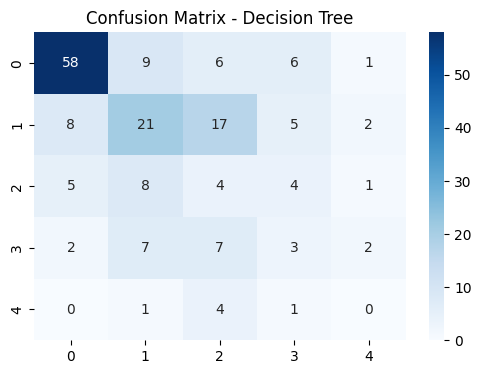

In [23]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show

In [24]:
# 5. Hyperparameter Tuning
# Grid Search for best parameters
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [25]:
grid_search.fit(X_resampled, y_resampled)
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
# Best model
best_dt = grid_search.best_estimator_
best_pred = best_dt.predict(X_test_scaled)
best_proba = best_dt.predict_proba(X_test_scaled)

In [27]:
# Evaluation
print("\nTuned Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, best_pred))
print("Classification Report:\n", classification_report(y_test, best_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_proba, multi_class="ovr", average="macro"))


Tuned Decision Tree Performance:
Accuracy: 0.4175824175824176
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65        80
           1       0.40      0.40      0.40        53
           2       0.12      0.14      0.13        22
           3       0.12      0.14      0.13        21
           4       0.00      0.00      0.00         6

    accuracy                           0.42       182
   macro avg       0.27      0.26      0.26       182
weighted avg       0.45      0.42      0.43       182

ROC-AUC Score: 0.550924986144319


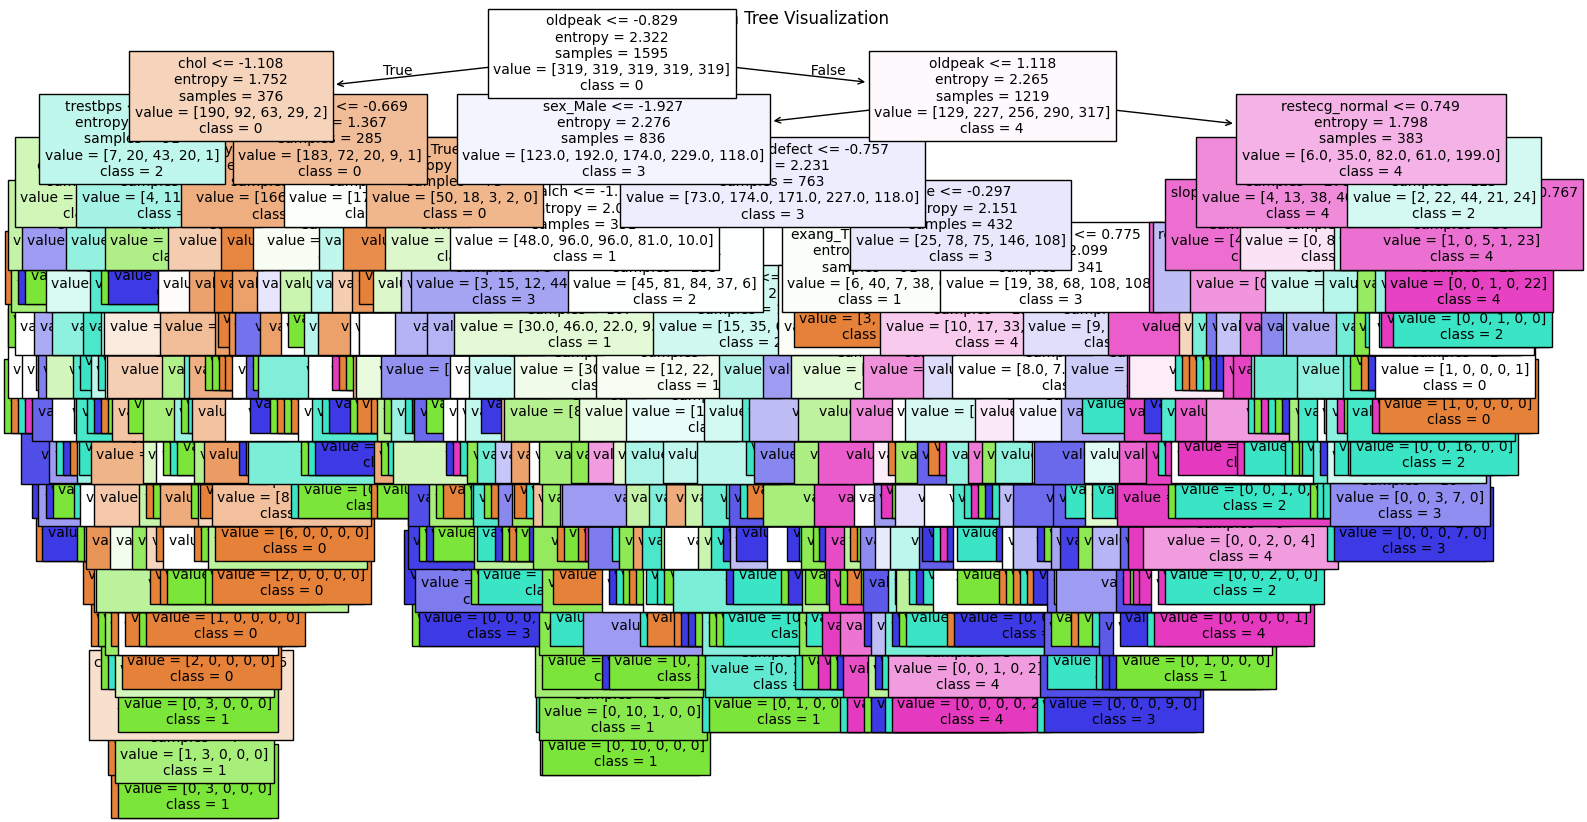

In [28]:
# 6. Model Evaluation & Visualization
# Visualize the Decision Tree
plt.figure(figsize=(18,10))
plot_tree(
    best_dt, 
    feature_names=X.columns, 
    class_names=[str(c) for c in np.unique(y)], 
    filled=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [29]:
# Interview Questions
print("""
Q1. Common hyperparameters of Decision Trees:
- max_depth: Limits tree depth, prevents overfitting.
- min_samples_split: Minimum samples required to split a node, higher → more generalization.
- min_samples_leaf: Minimum samples in a leaf node.
- criterion: Function to measure split quality ('gini' or 'entropy').

Q2. Label Encoding vs One-Hot Encoding:
- Label Encoding: Assigns each category a number (0,1,2...). Useful for ordinal data, but may mislead model for nominal data.
- One-Hot Encoding: Creates binary columns for each category. Prevents ordinal relationship issues but increases dimensionality.
""")


Q1. Common hyperparameters of Decision Trees:
- max_depth: Limits tree depth, prevents overfitting.
- min_samples_split: Minimum samples required to split a node, higher → more generalization.
- min_samples_leaf: Minimum samples in a leaf node.
- criterion: Function to measure split quality ('gini' or 'entropy').

Q2. Label Encoding vs One-Hot Encoding:
- Label Encoding: Assigns each category a number (0,1,2...). Useful for ordinal data, but may mislead model for nominal data.
- One-Hot Encoding: Creates binary columns for each category. Prevents ordinal relationship issues but increases dimensionality.

